In [29]:
import pickle
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('seaborn-whitegrid')


In [2]:
tups = []
fls = glob.glob("MNIST10_*")
for file in fls:
    in_file = pickle.load(open(file, 'rb'))
    file_info = file[:-2].split('_')[1:]
    batch, epochs, gclip, iclip, rho = file_info
    batch, epochs, gclip, iclip, rho = int(batch), int(epochs), float(gclip), float(iclip), float(rho)
    for fi in in_file:
        inf, tl, correct = fi
        tups.append((batch, epochs, gclip, iclip, rho, correct/10000))
data = pd.DataFrame(tups)
data.columns = ['batch', 'epochs', 'grad clip', 'inp clip', 'rho', 'acc']

In [7]:
def zcdp_eps(rho, delta):
    if rho == -1:
        return -1
    return rho + 2*np.sqrt(rho*np.log(1/delta))

eps = [zcdp_eps(i, 1e-5)*j for i, j in zip(data['rho'], data['epochs'])]
data['eps'] = eps

In [16]:
dat = data[(data['batch'] == 4096) & (data['rho'] < .001)]
dg = dat.groupby(['batch', 'epochs', 'grad clip', 'inp clip','rho']).agg(['mean', 'std'])

In [17]:
dg

acc                  eps  \
                                                  mean       std       mean   
batch epochs grad clip inp clip rho                                           
4096  25     0.01      1.0      -1.000000e+00  0.98663  0.002707 -25.000000   
                                 0.000000e+00  0.98914  0.000974   0.000000   
                                 1.000000e-07  0.97613  0.001234   0.053652   
                                 1.000000e-06  0.98635  0.000737   0.169679   
                                 1.000000e-05  0.98889  0.000979   0.536742   
                                 5.000000e-05  0.98947  0.000607   1.200881   
                                 1.000000e-04  0.98965  0.001265   1.699035   

                                                    
                                               std  
batch epochs grad clip inp clip rho                 
4096  25     0.01      1.0      -1.000000e+00  0.0  
                                 0.000000e+00  0.0  
                                 1.000000e-07  0.0  
                                 1.000000e-06  0.0  
                                 1.000000e-05  0.0  
                                 5.000000e-05  0.0  
                                 1.000000e-04  0.0

In [36]:
plt_d = dg[dg['eps']['mean'] > 0]
clip = dg[dg['eps']['mean'] == 0]['acc']['mean']
base = dg[dg['eps']['mean'] < 0]['acc']['mean']
base = .99

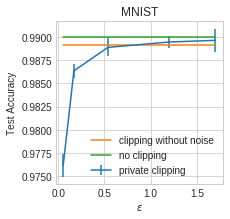

In [37]:
fig = plt.gcf()
fig.set_size_inches(3,3)
plt.errorbar(plt_d['eps']['mean'], plt_d['acc']['mean'], yerr = plt_d['acc']['std'], label='private clipping')
plt.plot(plt_d['eps']['mean'], [clip for i in range(len(plt_d['eps']['mean']))], label='clipping without noise')
plt.plot(plt_d['eps']['mean'], [base for i in range(len(plt_d['eps']['mean']))], label='no clipping')
plt.legend()
plt.title('MNIST')
plt.xlabel('$\epsilon$')
plt.ylabel('Test Accuracy')
plt.savefig('/home/ubuntu/backprop_clipping/figures/minst_accuracy.pdf', dpi=400)

In [6]:
dg

acc       eps
batch epochs grad clip inp clip rho                        
2048  15     0.00001   5.0      0.000000  0.98813  0.000000
                                0.000001  0.98557  0.101807
                                0.000010  0.98772  0.322045
                                0.000050  0.98822  0.720529
                                0.000100  0.98790  1.019421
4096  25     0.01000   1.0      0.000000  0.98914  0.000000
                                0.000001  0.98635  0.169679
                                0.000010  0.98889  0.536742
                                0.000050  0.98947  1.200881
                                0.000100  0.98965  1.699035
                                0.001000  0.99067  5.389915